In [180]:
# Importing Libraries
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup


# Importing selenium webdriver 
from selenium import webdriver

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

In [181]:
driver=webdriver.Chrome("chromedriver.exe")

In [49]:
url1="https://www.amazon.in/s?k=laptops&ref=nb_sb_noss"
url2="https://www.amazon.in/s?k=Phones&ref=nb_sb_noss_2"
url3="https://www.amazon.in/s?k=Headphones&ref=nb_sb_noss"
url4="https://www.amazon.in/s?k=smart+watches&ref=nb_sb_noss"
url5="https://www.amazon.in/s?k=Professional+Cameras&ref=nb_sb_noss"
url6="https://www.amazon.in/s?k=Printers&ref=nb_sb_noss"
url7="https://www.amazon.in/s?k=monitors&ref=nb_sb_noss_2"
url8="https://www.amazon.in/s?k=Home+theater&ref=nb_sb_noss_2"

# Scraping laptop data from amazon

In [23]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get("https://www.amazon.in/s?k=laptops&ref=nb_sb_noss"1)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [24]:
for url in urls:
    driver.get(url)                                                        # Loading the webpage by url
    print("Scraping URL = ", url)

Scraping URL =  https://www.amazon.in/Lenovo-Ideapad-Laptop-Windows-81W100HHIN/dp/B08G5M5WTG/ref=sr_1_3?dchild=1&keywords=laptops&qid=1625238089&sr=8-3
Scraping URL =  https://www.amazon.in/HP-15-6-inch-Laptop-Windows-15s-gy0003AU/dp/B08RFTYKFZ/ref=sr_1_4?dchild=1&keywords=laptops&qid=1625238089&sr=8-4
Scraping URL =  https://www.amazon.in/ASUS-VivoBook-Integrated-Transparent-X515MA-BR002T/dp/B08CKY5XX3/ref=sr_1_5?dchild=1&keywords=laptops&qid=1625238089&sr=8-5
Scraping URL =  https://www.amazon.in/HP-Pentium-Processor-15-6-inch-15s-du1052tu/dp/B08HJZHTM1/ref=sr_1_6?dchild=1&keywords=laptops&qid=1625238089&sr=8-6
Scraping URL =  https://www.amazon.in/HP-3-3250-Laptop-Windows-15s-gr0012AU/dp/B08T6THSMQ/ref=sr_1_7?dchild=1&keywords=laptops&qid=1625238089&sr=8-7
Scraping URL =  https://www.amazon.in/Renewed-Fujitsu-15-6-Inch-Windows-Graphics/dp/B091B6K2ZM/ref=sr_1_8?dchild=1&keywords=laptops&qid=1625238089&sr=8-8
Scraping URL =  https://www.amazon.in/HP-15-6-inch-Laptop-i3-10110U-15s-du10

In [25]:
urls_page=[]

In [26]:

for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/RVJSKGU0TC392/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08G5M5WTG
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3BKSUI19FZ0J6/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08G5M5WTG
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3MPZTOIJH1TA9/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08G5M5WTG
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2GPW9KVWUZZP2/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08G5M5WTG
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2MY3DBLJ1G344/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08RFTYKFZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R13YCKDXYEAVCQ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08RFTYKFZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1S447WVBAPH9F/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08RFTYKFZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R34V4REA5C35US/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08RFTYKFZ
Scraping URL =  https://www.amazon.in/gp/

In [29]:
rating=[]
review=[]

In [30]:
# This code will take aprroximately 15 to 16 Hours
for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [31]:
print(len(review),len(rating))

987 987


In [32]:
import pandas as pd
Rating1 = pd.DataFrame()
Rating1['Review']=review
Rating1['Rating']=rating

In [33]:
Rating1

Review Rating
0      In the caption it was written as i3 processo...   1.0 
1      It is mentioned that it contains intel proce...   1.0 
2                                             No words   1.0 
3      Very slim ,light weight easily carry in trav...   4.0 
4      I bought this exchanging my Acer Aspire V5 i...   5.0 
..                                                 ...    ...
982    Your browser does not support HTML5 video.  ...   1.0 
983    Fast laptop with under average camera and sp...   3.0 
984    Built quality is flimsy could have been impr...   3.0 
985    Ok ok. Touch part has sound. Built quality n...   3.0 
986                         Wonderful laptop! 5 stars!   5.0 

[987 rows x 2 columns]

# Scraping phones reviwes from amazon

In [138]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get(url2)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [139]:
urls_page=[]

In [140]:

for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/R5419T78W99RU/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2QELXPTP2YXKK/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R302XVYV04XU2H/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3TUDEF0YX5ZHB/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1SXRXDOEAEWIN/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R112GIJZOB5NT8/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1L9NJJIG8YR9E/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2DCKZY6QE3AEN/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43N
Scraping URL =  https://www.amazon.in/gp/

In [141]:
print(len(urls_page))

1694


In [142]:
rating=[]
review=[]

In [143]:

for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [144]:
print(len(review),len(rating))

1267 1267


In [145]:
import pandas as pd
Rating2 = pd.DataFrame()
Rating2['Review']=review
Rating2['Rating']=rating

In [148]:
Rating2.head(20)

Review Rating
0     Let’s make one thing clear immediately: the ...   4.0 
1     Best buy at this price! The display quality ...   5.0 
2     Good product value for money but ordering is...   5.0 
3     This phone is not value for moneyIts a downg...   1.0 
4     Camera quality is not good. It is mentioned ...   1.0 
5     Excellent mobile for daily use @7500/-. Don'...   5.0 
6     If I started to rating it's all features, it...   5.0 
7     I purchased it for my Mother, Decent product...   4.0 
8     Battery is getting drained out quite fast. 7...   1.0 
9     If you are looking for low budget phone this...   4.0 
10    Camera quality is not good. It is mentioned ...   1.0 
11    Excellent mobile for daily use @7500/-. Don'...   5.0 
12    If I started to rating it's all features, it...   5.0 
13    Battery is getting drained out quite fast. 7...   1.0 
14    Not as good as redmi 8a, no type C , no fast...   3.0 
15    What !!! 13k priced phone with Snapdragon 45...   1.0 
16    The phone comes with a 6.40-inch touchscreen...   4.0 
17    Samsung M11 Pros- 1) Display--  Nice but of ...   3.0 
18    The battery life is promising, UI is great, ...   5.0 
19    Got a defect piece, mobile got switched off,...   1.0

In [147]:
Rating1

Review Rating
0            One of the best product at this price....   5.0 
1                                       Very good ....   4.0 
2      Best laptop under 40k. 1TB HDD, 256GB SSD, 8...   5.0 
3      Best laptop..Display in awesome...Build qual...   5.0 
4      Very good product.. Excelent speed.. A camer...   5.0 
..                                                 ...    ...
606    This product is very tempting but useless. L...   1.0 
607    Your browser does not support HTML5 video.  ...   5.0 
608    Very good configuration in this price range....   5.0 
609                     the computer in not getting on   1.0 
610          Almost good with price and specifications   4.0 

[611 rows x 2 columns]

In [149]:
import pandas as pd
rate=pd.concat([Rating1, Rating2], ignore_index=True)

In [150]:
rate.shape

(1878, 2)

In [151]:
#saving to csv so that we can import data later
rate.to_csv('raterate.csv')

# Scraping reviwes of Headphones from amazon

In [50]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get(url3)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [32]:
urls_page=[]
for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2YOYBZG2HDNQL/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3ACZLA4U7APRI/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1ALETJEMQ24MD/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1HY3733G1J5LW/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3JXGG77BA60FH/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3DDMMRLED0QTB/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3JGK6W5XBSB7I/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2B1XQQX6YROYN/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B074ZF7PVZ
Scraping URL =  https://www.amazon.in/gp

In [33]:
print(len(urls_page))

1598


In [55]:
review=[]
rating=[]
for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [53]:
print(len(review),len(rating))


776 776


In [43]:
import pandas as pd
Rating3 = pd.DataFrame()
Rating3['Review']=review
Rating3['Rating']=rating

In [39]:
Rating3.head()

Review Rating
0    It has stopped working within warranty perio...   1.0 
1    This is my honest review after using it for ...   5.0 
2                     Received second hand headphone   1.0 
3    The Boat bass heads really live up to their ...   4.0 
4    I had just got this headphones day before ye...   1.0

# Scraping reviews of smart watches from amazon

In [78]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get(url4)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [81]:
urls_page=[]
for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1JWVJZAYL2REB/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/customer-reviews/RYPSQEIFLP69H/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R12N1RPOE521LO/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3LOCEVS2HTCZV/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3I3HP9OSIM0OK/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1QHF1H7UM3MS4/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R270SD598FMZXY/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R21RXNWNCL8FC1/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07YY1BY5B
Scraping URL =  https://www.amazon.in/gp/

In [82]:
print(len(urls_page))

1277


In [83]:
review=[]
rating=[]
for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [84]:
import pandas as pd
Rating4 = pd.DataFrame()
Rating4['Review']=review
Rating4['Rating']=rating

In [85]:
Rating4

Review Rating
0      Your browser does not support HTML5 video.  ...   5.0 
1      Pathetic quality product, not even worth 100...   1.0 
2      I am not getting call notification in smart ...   2.0 
3      this product does not support with one plus ...   1.0 
4      Don't buy this product!!I received this prod...   1.0 
..                                                 ...    ...
730    Perfect for for Noise endure smart watch.Com...   5.0 
731                                    value for money   5.0 
732                                  Very good product   5.0 
733    Product is good one. Values of money.Its eas...   5.0 
734    This watch is awesome. Extremely out of the ...   5.0 

[735 rows x 2 columns]

In [86]:
import pandas as pd
rate1=pd.concat([Rating3, Rating4], ignore_index=True)

In [87]:
rate1.shape

(1511, 2)

In [88]:
rate1.to_csv('raterate1.csv')

# Scraping reviews of Professional Cameras from Amazon

In [93]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get(url5)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [94]:
urls_page=[]
for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3B6WJGGSOCZEE/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/customer-reviews/RB5W7TG8Q1DI5/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1DJBCMVXMTEXV/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1IRG6R3KI2GVA/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/customer-reviews/RU57MESO3027/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1WJVA5YBF5R3Y/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R6S384RJSZXTH/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1E4CYMUDGWC0I/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B01BUYJX6G
Scraping URL =  https://www.amazon.in/gp/cus

In [95]:
print(len(urls_page))

652


In [96]:
review=[]
rating=[]
for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [97]:
import pandas as pd
Rating5 = pd.DataFrame()
Rating5['Review']=review
Rating5['Rating']=rating

In [98]:
Rating5

Review Rating
0      I have bought it EOS80D, when I tried to reg...   2.0 
1                                       Awesome camera   5.0 
2      I bought this camera in September 2016 and b...   3.0 
3      In August 2020 ordered an iPhone from Amazon...   1.0 
4      Its a Woooww.. Wonderful product.. I bought ...   5.0 
..                                                 ...    ...
420    the best mirrorless camera....for beginner a...   5.0 
421                               I liked it very much   4.0 
422    Loving the camera with its lenses. The resul...   5.0 
423    Good must but very useful I loved this produ...   5.0 
424                                            Not bad   4.0 

[425 rows x 2 columns]

In [101]:
rate2=pd.concat([Rating5, rate1], ignore_index=True)

In [103]:
#saving to csv so that we can import data later
rate2.to_csv('raterate2.csv')

# Scraping reviews of Printers from Amazon

In [108]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get(url6)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [109]:
urls_page=[]
for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3AMQHCTAR722Y/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R15SOHCFJ4RIVX/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1XKQ0ZG5ZOMPU/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3IHNGPOFI8AZE/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R15FFY7SYEOKS1/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R31BB48PQHRJ1M/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R8FN6ZURTAT3M/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3B4P9N0KKIVBP/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08D9N3VCX
Scraping URL =  https://www.amazon.in/gp/

In [110]:
print(len(urls_page))

968


In [111]:
review=[]
rating=[]
for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [112]:
import pandas as pd
Rating6 = pd.DataFrame()
Rating6['Review']=review
Rating6['Rating']=rating

In [114]:
Rating6

Review Rating
0      Easily the best printer in this price range....   5.0 
1      A little about this printer:1) Build quality...   3.0 
2      Excellent product for home use....you can pr...   5.0 
3      This was the worst printer i have ever order...   1.0 
4      The page started getting stuck from the very...   1.0 
..                                                 ...    ...
673    printer have manufactured defects. brother e...   1.0 
674    The print quality is great and it's quite fa...   4.0 
675    It is very Good and Excellent product.... Ea...   5.0 
676    Super Duper Printer... This prints both side...   5.0 
677    Value for money mono laser printer that has ...   5.0 

[678 rows x 2 columns]

In [116]:
rate3=pd.concat([Rating6, rate2], ignore_index=True)

In [117]:
rate3

Review Rating
0       Easily the best printer in this price range....   5.0 
1       A little about this printer:1) Build quality...   3.0 
2       Excellent product for home use....you can pr...   5.0 
3       This was the worst printer i have ever order...   1.0 
4       The page started getting stuck from the very...   1.0 
...                                                 ...    ...
2609    Perfect for for Noise endure smart watch.Com...   5.0 
2610                                    value for money   5.0 
2611                                  Very good product   5.0 
2612    Product is good one. Values of money.Its eas...   5.0 
2613    This watch is awesome. Extremely out of the ...   5.0 

[2614 rows x 2 columns]

In [118]:
#saving to csv so that we can import data later
rate3.to_csv('raterate3.csv')

# Scraping reviwes of monitors from amazon

In [5]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get(url7)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [6]:
urls_page=[]
for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/R17PZFNUYIBDZN/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2A7SODRQ7E19I/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/customer-reviews/RS3WF7HUDWQ3J/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2GT0GJUMHK8CS/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R30K5B8V5GVOXJ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2MISQOYA3XPFE/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1L6SNE2C7B7GB/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3U0616RKMV2DD/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B084DM2CRP
Scraping URL =  https://www.amazon.in/gp/

In [8]:
print(len(urls_page))

1405


In [7]:
review=[]
rating=[]
for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [9]:
import pandas as pd
Rating7 = pd.DataFrame()
Rating7['Review']=review
Rating7['Rating']=rating

In [10]:
Rating7

Review Rating
0       due to COVID - 19 my office instructed to WF...   4.0 
1       This is one of the best displays that I've c...   4.0 
2       Received Yellow shaded screen and got replac...   2.0 
3       Neither bad , nor Good . For the price its o...   1.0 
4       Good monitor but the major issue what I've f...   2.0 
...                                                 ...    ...
1020    Liked:- Height adjustment,- Tilt-up and down...   5.0 
1021    Price to performance is not worth. Color is ...   4.0 
1022                                            Not bad   3.0 
1023    overall very good monitor, default colors ar...   5.0 
1024    I have been using this for the last 1 month ...   4.0 

[1025 rows x 2 columns]

# Scraping reviwes of Home theater from amazon

In [11]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get(url8)
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [12]:
urls_page=[]
for url in urls:
    driver.get(url) 
    try:
        page_urls1 = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url1 in page_urls1:
            url1 = url1.get_attribute('href')     # Scraping the url from webelement
            if url1=='http':                # Checking if the scraped data is a valid url or not
                urls1.append(url1)# Appending the url to urls list
            print("Scraping URL = ", url1)
            urls_page.append(url1)

            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception") 

Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3C2JB9CP4F97F/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2T8IJ3A0L1E8G/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/customer-reviews/RDC7SCIF0K8RQ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/customer-reviews/RN6WJPP46F1GJ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R2RX7N1CMCQ197/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/customer-reviews/RDO3I2O7KLQME/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R3IZAL7JCVDF6H/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/customer-reviews/R1UM9DP62G9QCQ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07ZGVB9SM
Scraping URL =  https://www.amazon.in/gp/cu

In [13]:
print(len(urls_page))

1354


In [18]:
review=[]
rating=[]
for url in urls_page:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [15]:
import pandas as pd
Rating8 = pd.DataFrame()
Rating8['Review']=review
Rating8['Rating']=rating

In [17]:
Rating8

Review Rating
0      Your browser does not support HTML5 video.  ...   3.0 
1      10 day return window, unlike the 1 month ret...   1.0 
2      superb product quality thank you amazon and ...   5.0 
3      Best sound quality, and bass. Value for mone...   4.0 
4      I was looking for a value for money radio wi...   3.0 
..                                                 ...    ...
761    This product is very poor package two speake...   1.0 
762    Your browser does not support HTML5 video.  ...   5.0 
763    I'm an audio afficionado and I'm very happy ...   5.0 
764    The Best of Everything. Don't Buy Cheap 5.1 ...   5.0 
765    Just go for normal pebble 2.0 if you really ...   4.0 

[766 rows x 2 columns]

In [38]:
rate4=pd.concat([Rating1,Rating7,Rating8], ignore_index=True)

In [39]:
rate4

Review Rating
0       In the caption it was written as i3 processo...   1.0 
1       It is mentioned that it contains intel proce...   1.0 
2                                              No words   1.0 
3       Very slim ,light weight easily carry in trav...   4.0 
4       I bought this exchanging my Acer Aspire V5 i...   5.0 
...                                                 ...    ...
2773    This product is very poor package two speake...   1.0 
2774    Your browser does not support HTML5 video.  ...   5.0 
2775    I'm an audio afficionado and I'm very happy ...   5.0 
2776    The Best of Everything. Don't Buy Cheap 5.1 ...   5.0 
2777    Just go for normal pebble 2.0 if you really ...   4.0 

[2778 rows x 2 columns]

In [40]:
rate4.to_csv('raterate4.csv')

In [46]:
rate2=pd.read_csv('raterate2.csv')

In [47]:
rate2

Unnamed: 0                                             Review  Rating
0              0    I have bought it EOS80D, when I tried to reg...     2.0
1              1                                     Awesome camera     5.0
2              2    I bought this camera in September 2016 and b...     3.0
3              3    In August 2020 ordered an iPhone from Amazon...     1.0
4              4    Its a Woooww.. Wonderful product.. I bought ...     5.0
...          ...                                                ...     ...
1931        1931    Perfect for for Noise endure smart watch.Com...     5.0
1932        1932                                    value for money     5.0
1933        1933                                  Very good product     5.0
1934        1934    Product is good one. Values of money.Its eas...     5.0
1935        1935    This watch is awesome. Extremely out of the ...     5.0

[1936 rows x 3 columns]

In [48]:
rate3=pd.read_csv('raterate3.csv')

In [49]:
rate4=pd.read_csv('raterate4.csv')

In [50]:
rate_final=pd.concat([rate,rate1,rate2,rate3,rate4], ignore_index=True)

In [51]:
rate_final

Unnamed: 0                                             Review  Rating
0               0          One of the best product at this price....     5.0
1               1                                     Very good ....     4.0
2               2    Best laptop under 40k. 1TB HDD, 256GB SSD, 8...     5.0
3               3    Best laptop..Display in awesome...Build qual...     5.0
4               4    Very good product.. Excelent speed.. A camer...     5.0
...           ...                                                ...     ...
10712        2773    This product is very poor package two speake...     1.0
10713        2774    Your browser does not support HTML5 video.  ...     5.0
10714        2775    I'm an audio afficionado and I'm very happy ...     5.0
10715        2776    The Best of Everything. Don't Buy Cheap 5.1 ...     5.0
10716        2777    Just go for normal pebble 2.0 if you really ...     4.0

[10717 rows x 3 columns]

In [60]:
rate_final.drop_duplicates(keep=False,inplace=True)

In [61]:
rate_final

Review  Rating
6        Its Japanese built laptop, keyboard has been...     4.0
8        Writing after a week of usage :- Excellent i...     5.0
20       Value for moneyDelivery in one dayRunning ve...     5.0
21       Your browser does not support HTML5 video.  ...     3.0
26       Really I get what I want.This is the best la...     5.0
...                                                  ...     ...
10712    This product is very poor package two speake...     1.0
10713    Your browser does not support HTML5 video.  ...     5.0
10714    I'm an audio afficionado and I'm very happy ...     5.0
10715    The Best of Everything. Don't Buy Cheap 5.1 ...     5.0
10716    Just go for normal pebble 2.0 if you really ...     4.0

[3589 rows x 2 columns]

In [62]:
#saving to csv so that we can import data later
rate_final.to_csv('rate_final.csv')

# reviews

In [11]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/Redmi-Sky-Blue-64GB-Storage/product-reviews/B08697N43N/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
start_page = 0
end_page = 100
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [12]:
print(len(urls))

1010


In [13]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', class_='review-rating')
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [14]:
print(len(review),len(rating))

429 429


In [15]:
import pandas as pd
Rating9 = pd.DataFrame()
Rating9['Review']=review
Rating9['Rating']=rating

In [16]:
Rating9

Review Rating
0      Don’t buy this product .Image quality is bel...   1.0 
1      i didn't upload photo ....for any reason but...   4.0 
2      Good product value for money but ordering is...   5.0 
3                                          Good mobile   5.0 
4      Processor is bit slow, camera is below avera...   3.0 
..                                                 ...    ...
424    Pathetic Camera, absolute blunder can't retu...   1.0 
425                                         Excellent👍   5.0 
426    Everything is good.. But screen guard and ea...   5.0 
427                         Good product within range.   5.0 
428                 Very good phone under this price👌👌   4.0 

[429 rows x 2 columns]

# review2

In [21]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/HP-Laptop-14-inch-Windows-14s-dy2500TU/product-reviews/B08XY3QXY5/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
start_page = 0
end_page = 34
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [22]:
print(len(urls))

350


In [27]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(3)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [28]:
len(review)

278

In [29]:
import pandas as pd
Rating10 = pd.DataFrame()
Rating10['Review']=review
Rating10['Rating']=rating

In [30]:
Rating10

Review Rating
0      Brilliant productMost of the configurations ...   5.0 
1      First got the product delivered couple of da...   1.0 
2      I've been using it for 3-4 days now. Experie...   3.0 
3      It's the worst product ever. First time when...   1.0 
4      Very good product in these range, under 40,0...   5.0 
..                                                 ...    ...
273    Ms office is installed but when activated it...   3.0 
274    For this price you will not get a better lap...   5.0 
275    Camera quality was worst and flocking, stuck...   3.0 
276    Screen quality and processing quality is ver...   5.0 
277    Have been using this for more than a month n...   5.0 

[278 rows x 2 columns]

# review3

In [31]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/Samsung-Galaxy-Storage-Triple-Camera/product-reviews/B08RSY2653/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
start_page = 0
end_page = 200
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [32]:
print(len(urls))

2010


In [34]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [35]:
len(review)

1681

In [36]:
import pandas as pd
Rating11 = pd.DataFrame()
Rating11['Review']=review
Rating11['Rating']=rating

In [37]:
rate_final1=pd.concat([Rating9, Rating10,Rating11], ignore_index=True)

In [38]:
#saving to csv so that we can import data later
rate_final1.to_csv('rate_final1.csv')

In [39]:
rate_final1

Review Rating
0       Don’t buy this product .Image quality is bel...   1.0 
1       i didn't upload photo ....for any reason but...   4.0 
2       Good product value for money but ordering is...   5.0 
3                                           Good mobile   5.0 
4       Processor is bit slow, camera is below avera...   3.0 
...                                                 ...    ...
2383                                    Value for money   5.0 
2384                                    Horrible camera   1.0 
2385                                    Value for money   5.0 
2386                                    quality product   5.0 
2387                                    It's nice phone   5.0 

[2388 rows x 2 columns]

# Review4

In [4]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/Redmi-Note-Pebble-Grey-Storage/product-reviews/B086977TR6/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=two_star&pageNumber=1')
start_page = 0
end_page = 50
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page) 

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [5]:
print(len(urls))

510


In [6]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [7]:
len(review)

312

In [8]:
import pandas as pd
Rating12 = pd.DataFrame()
Rating12['Review']=review
Rating12['Rating']=rating

# review5

In [26]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/Fantasy-Storage-Additional-Exchange-Offers/product-reviews/B08444XVNP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
start_page = 0
end_page = 250
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [27]:
print(len(urls))

2510


In [28]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [29]:
len(review)

1851

In [30]:
import pandas as pd
Rating13 = pd.DataFrame()
Rating13['Review']=review
Rating13['Rating']=rating

# Review6

In [42]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/Test-Exclusive_2020_1130-Multi-3GB-Storage/product-reviews/B089MS9SSD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
start_page = 0
end_page = 350
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [43]:
print(len(urls))

3510


In [44]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [45]:
len(review)

2656

In [46]:
import pandas as pd
Rating14 = pd.DataFrame()
Rating14['Review']=review
Rating14['Rating']=rating

# Review7

In [47]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/OnePlus-Slate-Gray-64GB-memory/product-reviews/B01NAKTR2H/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=two_star&pageNumber=1')
start_page = 0
end_page = 39
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [48]:
print(len(urls))

400


In [49]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [50]:
len(review)

336

In [51]:
import pandas as pd
Rating15 = pd.DataFrame()
Rating15['Review']=review
Rating15['Rating']=rating

In [55]:
rate_final2=pd.concat([Rating12, Rating13,Rating14,Rating15], ignore_index=True)

In [56]:
rate_final2

Review Rating
0       Not good phone stopped working after some ti...   2.0 
1       Worst product, not as expected its not even ...   2.0 
2       Here my product review after usage of 3 mont...   2.0 
3       Looks premium and mi claims that it has quit...   2.0 
4       I took this phone because it says "made in i...   2.0 
...                                                 ...    ...
5150    Prompt deliveryBuild quality is goodDash cha...   2.0 
5151    The hype around this product doesn't boast o...   2.0 
5152    Initially I felt very good when I received t...   2.0 
5153    Dash charging was excellent for first one we...   2.0 
5154    Glass is not gorilla 5. It gets scratches ea...   2.0 

[5155 rows x 2 columns]

# Review8

In [4]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/OnePlus-Slate-Gray-64GB-memory/product-reviews/B01NAKTR2H/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=three_star&pageNumber=1')
start_page = 0
end_page = 62
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [5]:
print(len(urls))

630


In [6]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [7]:
import pandas as pd
Rating15 = pd.DataFrame()
Rating15['Review']=review
Rating15['Rating']=rating

In [8]:
Rating15

Review Rating
0      camera quality and battery life is good,but ...   3.0 
1      Great product but the 2 stars less for Amazo...   3.0 
2      I expected more from OnePlus. Used it for a ...   3.0 
3      Thank you Oneplus for the competitive pricin...   3.0 
4      The handset if performing good but after 4 m...   3.0 
..                                                 ...    ...
551    There were few issues with this mobile. So I...   3.0 
552    Sad that Oneplus company does not care about...   3.0 
553    Great mobile low light camera is not great a...   3.0 
554    Multiple issues with this phone. Jelly scree...   3.0 
555    Water damage is not covered under manufactur...   3.0 

[556 rows x 2 columns]

In [17]:
rate_final3=pd.concat([Rating16,Rating15], ignore_index=True)

In [18]:
#saving to csv so that we can import data later
rate_final3.to_csv('rate_final3.csv')

# Review8

In [12]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/Noise-ColorFit-Control-Upgraded-Display/product-reviews/B08S3LT43R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
start_page = 0
end_page = 500
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//li[@class='a-last']/a"}
  (Session info: chrome=91.0.4472.124)
  (Driver info: chromedriver=2.40.565498 (ea082db3280dd6843ebfb08a625e3eb905c4f5ab),platform=Windows NT 10.0.19042 x86_64)


In [13]:
print(len(urls))

5000


In [14]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [15]:
import pandas as pd
Rating16 = pd.DataFrame()
Rating16['Review']=review
Rating16['Rating']=rating

In [16]:
Rating16

Review Rating
0       Your browser does not support HTML5 video.  ...   5.0 
1       Pathetic quality product, not even worth 100...   1.0 
2       I am not getting call notification in smart ...   2.0 
3       Apart from showing accurate time & much heal...   1.0 
4       this product does not support with one plus ...   1.0 
...                                                 ...    ...
3878                                               Good   3.0 
3879    Satisfied with the watch. This watch made ea...   5.0 
3880    Fantastic product, just an amazing thing and...   5.0 
3881    Not getting WhatsApp notification on my watc...   3.0 
3882    It is bad quality watch.My hands got alergy ...   1.0 

[3883 rows x 2 columns]

In [61]:
import pandas as pd
rate=pd.read_csv('rate_final.csv')

In [63]:

rate1=pd.read_csv('rate_final1.csv')
rate2=pd.read_csv('rate_final2.csv')
rate3=pd.read_csv('rate_final3.csv')

In [64]:
rate_final=pd.concat([rate,rate1,rate2,rate3], ignore_index=True)

In [65]:
rate_final

Unnamed: 0                                             Review  Rating
0               6    Its Japanese built laptop, keyboard has been...     4.0
1               8    Writing after a week of usage :- Excellent i...     5.0
2              20    Value for moneyDelivery in one dayRunning ve...     5.0
3              21    Your browser does not support HTML5 video.  ...     3.0
4              26    Really I get what I want.This is the best la...     5.0
...           ...                                                ...     ...
15566        4434    There were few issues with this mobile. So I...     3.0
15567        4435    Sad that Oneplus company does not care about...     3.0
15568        4436    Great mobile low light camera is not great a...     3.0
15569        4437    Multiple issues with this phone. Jelly scree...     3.0
15570        4438    Water damage is not covered under manufactur...     3.0

[15571 rows x 3 columns]

In [77]:
#saving to csv so that we can import data later
rate_final.to_csv('final_rate.csv')

# review10

In [6]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/boAt-BassHeads-100-Headphones-Black/product-reviews/B071Z8M4KX/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=two_star&pageNumber=1')
start_page = 0
end_page = 270
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [7]:
print(len(urls))

2710


In [9]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [10]:
import pandas as pd
Rating17 = pd.DataFrame()
Rating17['Review']=review
Rating17['Rating']=rating

In [11]:
Rating17

Review Rating
0       I bought these since my earlier one had conk...   2.0 
1       Looks fine...Product quality ok...Sound qual...   2.0 
2       I didn't actually like the product. Because ...   2.0 
3       Build quality is good but performance is not...   2.0 
4       ProsPriceDesignBass - averageLength of wireE...   2.0 
...                                                 ...    ...
2379    Wahiyat. It was delivered long back ago but ...   2.0 
2380    Product quality good,but warranty and custom...   2.0 
2381    The cable is tangle-free for the most part a...   2.0 
2382    Sorry but not good bass and even though soun...   2.0 
2383    Bass is bestSound is very lowNoise cancellat...   2.0 

[2384 rows x 2 columns]

# review11

In [14]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get('https://www.amazon.in/Samsung-Galaxy-Ocean-128GB-Storage/product-reviews/B07HG8S7KP/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=three_star&pageNumber=1')
start_page = 0
end_page = 400
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [15]:
print(len(urls))

4010


In [16]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [17]:
import pandas as pd
Rating18 = pd.DataFrame()
Rating18['Review']=review
Rating18['Rating']=rating

In [18]:
Rating18

Review Rating
0       Not a Samsung performance. It seems it was l...   3.0 
1       It's one of the good looking phone with stun...   3.0 
2       I found the phone to be mediocre in performa...   3.0 
3                           use front cem iam not happy   3.0 
4       (After 2 months usage)The only advantage is ...   3.0 
...                                                 ...    ...
3497                  Fingerprint senior is not so good   3.0 
3498                  Fingerprint sencor is not better.   3.0 
3499                                            Not bad   3.0 
3500                                  Excellent product   3.0 
3501       Best mobile in this range.i like this phone.   3.0 

[3502 rows x 2 columns]

In [20]:
rateramya=pd.concat([Rating17,Rating18], ignore_index=True)

In [22]:
#saving to csv so that we can import data later
rateramya.to_csv('finalfinal2.csv')

# Review12

In [8]:
driver.get('https://www.amazon.in/Samsung-Galaxy-Ocean-128GB-Storage/product-reviews/B07HG8S7KP/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=four_star&pageNumber=1')
start_page = 0
end_page = 250
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [9]:
print(len(urls))

2510


In [10]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [11]:
import pandas as pd
Rating19 = pd.DataFrame()
Rating19['Review']=review
Rating19['Rating']=rating

In [12]:
Rating19

Review Rating
0       After using one week i have these experience...   4.0 
1       I can't believe within a month the phone scr...   4.0 
2       From the user of Samsung Guru 1200, Metro du...   4.0 
3       The phone is overall good but have some prob...   4.0 
4       Phones battery life is good but it gets heat...   4.0 
...                                                 ...    ...
1100    Everything thing is fine but  rear  camera i...   4.0 
1101    I'm using this phone for last 1 week. As of ...   4.0 
1102    Very good battery life. Even after using the...   4.0 
1103    Mobile is aswome in all features but most ir...   4.0 
1104    Best Mobile for the cost. Never seen this mo...   4.0 

[1105 rows x 2 columns]

# Review13

In [15]:
driver.get('https://www.amazon.in/Samsung-Galaxy-Ocean-128GB-Storage/product-reviews/B07HG8S7KP/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=one_star&pageNumber=1')
start_page = 0
end_page = 250
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [16]:
print(len(urls))

2509


In [17]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [18]:
import pandas as pd
Rating20 = pd.DataFrame()
Rating20['Review']=review
Rating20['Rating']=rating

In [19]:
Rating20

Review Rating
0       I am using it from 3 days , 6000 mah battery...   1.0 
1        Phone is very slow my opinion is west ur money   1.0 
2       I purchased this as soon as it was launched ...   1.0 
3       One of worst mobile and one of the worst bra...   1.0 
4       Worst mobile was I got , Samsung m31 taking ...   1.0 
...                                                 ...    ...
1800    Processor is very low having slow expierienc...   1.0 
1801    Sir the mobiles battery is not working prope...   1.0 
1802    Heating problems, apps are auto cloaing due ...   1.0 
1803    This phone is awful because of its system up...   1.0 
1804    Very patheticMy phone stopped working with i...   1.0 

[1805 rows x 2 columns]

# Review14

In [22]:
driver.get('https://www.amazon.in/Samsung-Galaxy-Ocean-128GB-Storage/product-reviews/B07HG8S7KP/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=two_star&pageNumber=1')
start_page = 0
end_page = 100
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [23]:
print(len(urls))

1010


In [24]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [25]:
import pandas as pd
Rating21 = pd.DataFrame()
Rating21['Review']=review
Rating21['Rating']=rating

In [191]:
Rating21

Review Rating
0      Your browser does not support HTML5 video.  ...   4.0 
1                               Potraiat mode very bad   4.0 
2      Your browser does not support HTML5 video.  ...   4.0 
3                            This mobile is very good.   4.0 
4      Excellent performance with SD 675 everything...   4.0 
..                                                 ...    ...
754                                               Nice   4.0 
755     All things is good but where is my head set???   4.0 
756                                   Nice product 👌👌👌   4.0 
757                 Nice finger print and battery life   4.0 
758                                         Nice phone   4.0 

[759 rows x 2 columns]

In [193]:
x=2

In [32]:
#saving to csv so that we can import data later
rate_final22.to_csv('finalfinal.csv')

In [23]:
import pandas as pd
rate=pd.read_csv('final_rate.csv')

In [25]:
rate1=pd.read_csv('finalfinal.csv')

In [27]:
rate2=pd.read_csv('finalfinal2.csv')


In [28]:
rating=pd.concat([rate,rate1,rate2,], ignore_index=True)

# review15

In [182]:
driver.get('https://www.amazon.in/Vivo-Racing-Black-Snapdragon-Storage/product-reviews/B081RW24Y6/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=four_star&pageNumber=1')
start_page = 0
end_page = 100
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']/a" or "//html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[12]/span/div/ul/li[2]/a" or "//*[@id='cm_cr-pagination_bar']/ul/li[2]")      # Locating the next_button which is active
        if nxt_button.text == 'Next page→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(3)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//a[@class='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold']").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.
Product urls of page 20 has been scraped.
Product urls of page 21 has been scraped.
Product urls of page 22 has been scraped.
Product urls of page 23 has been scraped.
Product urls of page 24 has been scraped.
P

In [183]:
print(len(urls))

1010


In [184]:
review=[]
rating=[]
for url in urls:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    time.sleep(1)
    try:
        re = soup.find_all('span',attrs={'data-hook':'review-body'})
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
            review.append('-')

    try:
        ra =soup.find_all('i', attrs={'data-hook':'review-star-rating'})
        for j in ra:
            rating.append(j.get_text().replace('out of 5 stars', ''))
    except NoSuchElementException:
            rating.append('-')

In [185]:
import pandas as pd
Rating21 = pd.DataFrame()
Rating21['Review']=review
Rating21['Rating']=rating

In [186]:
Rating21

Review Rating
0      Your browser does not support HTML5 video.  ...   4.0 
1                               Potraiat mode very bad   4.0 
2      Your browser does not support HTML5 video.  ...   4.0 
3                            This mobile is very good.   4.0 
4      Excellent performance with SD 675 everything...   4.0 
..                                                 ...    ...
754                                               Nice   4.0 
755     All things is good but where is my head set???   4.0 
756                                   Nice product 👌👌👌   4.0 
757                 Nice finger print and battery life   4.0 
758                                         Nice phone   4.0 

[759 rows x 2 columns]

In [194]:
Rating21.to_csv('finalfinal22.csv')

In [195]:
import pandas as pd
rate=pd.read_csv('final_rate.csv')
rate1=pd.read_csv('finalfinal.csv')
rate2=pd.read_csv('finalfinal2.csv')
rate3=pd.read_csv('finalfinal22.csv')

In [196]:
rating=pd.concat([rate,rate1,rate2,rate3], ignore_index=True)

In [197]:
rating.to_csv('rating.csv')

# Rating Prediction Project Starting

In [198]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
rating=pd.read_csv('rating.csv')

In [200]:
rating.shape

(25929, 5)

#### Observation:
    There 26096 rows and 5 columns

In [201]:
rating.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
0           0             0             6.0   
1           1             1             8.0   
2           2             2            20.0   
3           3             3            21.0   
4           4             4            26.0   

                                              Review  Rating  
0    Its Japanese built laptop, keyboard has been...     4.0  
1    Writing after a week of usage :- Excellent i...     5.0  
2    Value for moneyDelivery in one dayRunning ve...     5.0  
3    Your browser does not support HTML5 video.  ...     3.0  
4    Really I get what I want.This is the best la...     5.0

### Observation:
    There are unnecessary columns in data they are Unnamed: 0, Unnamed: 0.1, Unnamed: 0.1.1, we have to drop them to get data that is important.

In [202]:
rating=rating.drop('Unnamed: 0',axis=1)

In [203]:
rating=rating.drop('Unnamed: 0.1',axis=1)

In [204]:
rating=rating.drop('Unnamed: 0.1.1',axis=1)

In [205]:
rating.head()

Review  Rating
0    Its Japanese built laptop, keyboard has been...     4.0
1    Writing after a week of usage :- Excellent i...     5.0
2    Value for moneyDelivery in one dayRunning ve...     5.0
3    Your browser does not support HTML5 video.  ...     3.0
4    Really I get what I want.This is the best la...     5.0

In [206]:
#Removing duplicated so that data is cleaned
rating.drop_duplicates(keep=False,inplace=True)

In [207]:
rating.shape

(23838, 2)

### Observation:
    2.5K+ rows are removed

In [208]:
rating['Rating'].value_counts()

3.0    5276
5.0    5160
1.0    4697
2.0    4358
4.0    4347
Name: Rating, dtype: int64

### Observation:
    Almost all are equal in count.There are 5 outputs in data .Hence our project is classifiction type

In [209]:
rating.Rating.unique()

array([4., 5., 3., 1., 2.])

### Observation:
    Our output is float type converting it into int type to avoid decimal points.

In [210]:
#Converting float into int by using astype function
rating['Rating']=rating['Rating'].astype(int, errors='ignore')

In [211]:
rating.Rating.unique()

array([4, 5, 3, 1, 2])

### Observation:
    Our target variable is converted into int.

In [212]:
print('rating',rating.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23838 entries, 0 to 25927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  23836 non-null  object
 1   Rating  23838 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 465.6+ KB
rating None


### Obervation:
    Review and Rating are not matching may be there are null values in data.
    Review is object type and Rating is int type.

Review    2
Rating    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


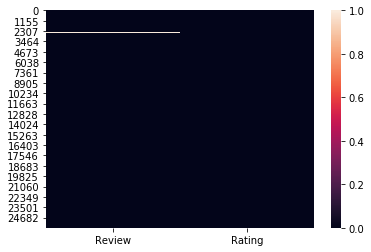

In [213]:
# checking null values
print(rating.isnull().sum())
print(sns.heatmap(rating.isnull()))

### Observation:
    There are null values in data.

In [214]:
#Cehcking shape before drop function
rating.shape

(23838, 2)

In [215]:
rating = rating.dropna()

In [216]:
#Checking shape after drop function
rating.shape

(23836, 2)

### Observation:
    We have dropped 2 rows as null values

        Rating
Rating     1.0
AxesSubplot(0.125,0.125;0.62x0.755)


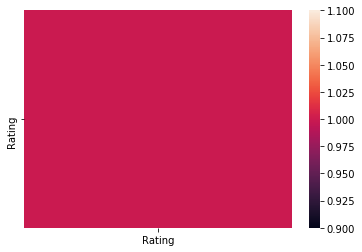

In [217]:
## checking correlation in dataset
print(rating.corr())
print(sns.heatmap(rating.corr()))

In [218]:
# checking the skewness for the features:
rating.skew()

Rating   -0.027097
dtype: float64

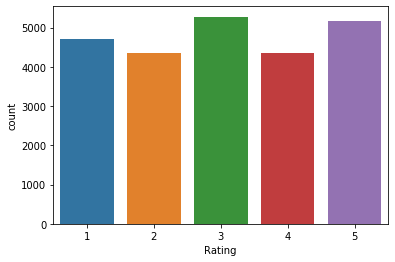

3    5275
5    5160
1    4696
2    4358
4    4347
Name: Rating, dtype: int64


In [219]:
sns.countplot(rating['Rating'])
plt.show()
print(rating['Rating'].value_counts())

### Observation:
    All are almost equal but rating 5 is little high

In [220]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [221]:
rating['length'] = rating['Review'].str.len()
rating.head()

Review  Rating  length
0    Its Japanese built laptop, keyboard has been...       4     395
1    Writing after a week of usage :- Excellent i...       5     166
2    Value for moneyDelivery in one dayRunning ve...       5     137
3    Your browser does not support HTML5 video.  ...       3     323
4    Really I get what I want.This is the best la...       5     250

### Observation:
    Length of comment_text is formed as length in dataframe.

In [222]:
# Convert all messages to lower case
rating['Review'] = rating['Review'].str.lower()

# Replace email addresses with 'email'
rating['Reviewt'] = rating['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
rating['Review'] =rating['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
rating['Review'] = rating['Review'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
rating['Review'] = rating['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
rating['Review'] = rating['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')


rating['Review'] = rating['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
rating['Review'] = rating['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
rating['Review'] = rating['Review'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

### Observation:
    Our data is cleaned but there can be some emoji's in data.

In [223]:
import re
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)  

def remove_emoji(string):
    return emoji_pattern.sub(r'', string)


rating['Review'] = rating['Review'].apply(remove_emoji)

In [224]:
rating['Review_cleaned'] = rating.Review.str.len()

In [228]:
rating.columns

Index(['Review', 'Rating', 'length', 'Review_cleaned'], dtype='object')

In [229]:
rating.head()

Review  Rating  length  \
0  japanese built laptop, keyboard modified stick...       4     395   
1  writing week usage :- excellent build quality....       5     166   
2  value moneydelivery one dayrunning smoothgreat...       5     137   
3  browser support htmlnumbr video. got numbrkbat...       3     323   
4  really get want.this best laptop computer acco...       5     250   

   Review_cleaned  
0             279  
1             135  
2             114  
3             276  
4             177

### Observation:
    After cleaning and removing special characters with observe the difference between lengths

In [230]:
rating=rating.drop('Review_cleaned',axis=1)

In [231]:
rating=rating.drop('length',axis=1)

In [232]:
rating.head(20)

Review  Rating
0   japanese built laptop, keyboard modified stick...       4
1   writing week usage :- excellent build quality....       5
2   value moneydelivery one dayrunning smoothgreat...       5
3   browser support htmlnumbr video. got numbrkbat...       3
4   really get want.this best laptop computer acco...       5
5   browser support htmlnumbr video. booting takin...       4
6   received today.such excellent light weight lap...       5
7   awesome laptop.don't rely negative reviews.bes...       5
8   bored intel inumbr hence went ryzen. personal ...       4
9   super slow laptop. buy laptop. take long time ...       1
10  show microsoft office numbr given prodúct true...       1
11  using since last numbr days, far performance g...       4
12  hat amazon, hp microsoft customer care support...       5
13  old. used year. batterry replaced another mode...       1
14  looking basic commercial laptop light office w...       5
15        slow lagging look like old celron processor       1
16                       nice anti glare sleek screen       5
17  worst laptop, poor battery backup, low sound, ...       1
18  good lookingpoor audiopoor battery back up.poo...       3
19  normal purpose like chrome, word, excel, ppt, ...       5

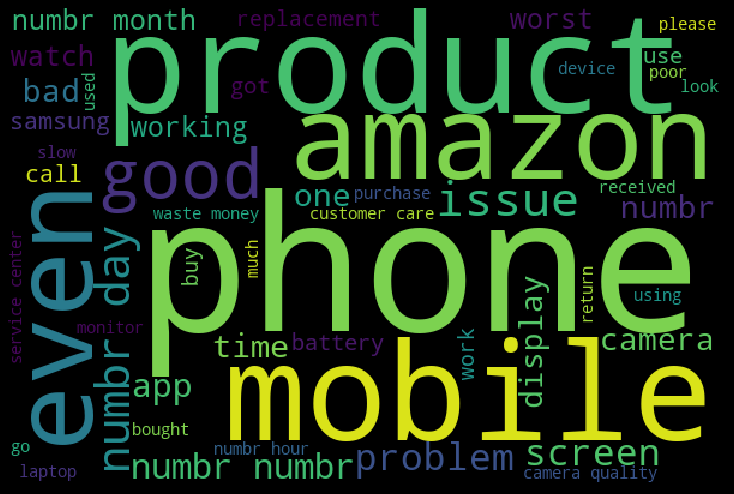

In [234]:
#Getting sense of loud words which are used to predict rating
from wordcloud import WordCloud
hams = rating['Review'][rating['Rating']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observation:
    showing top 15 words in column that gives meaning to the review.

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### Observation:
    Importing all modles for modeling

In [236]:
#Seprating into input and output variables
x=rating.drop(['Rating'],axis=1)

In [237]:
y=pd.DataFrame(rating['Rating'])

In [238]:
x.columns

Index(['Review'], dtype='object')

In [239]:
x.head()

Review
0  japanese built laptop, keyboard modified stick...
1  writing week usage :- excellent build quality....
2  value moneydelivery one dayrunning smoothgreat...
3  browser support htmlnumbr video. got numbrkbat...
4  really get want.this best laptop computer acco...

In [240]:
y.head()

Rating
0       4
1       5
2       5
3       3
4       5

In [241]:
x.shape

(23836, 1)

In [242]:
y.shape

(23836, 1)

In [244]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
x = tf_vec.fit_transform(rating['Review'])

### Observation:
    Converted text into vectors using TF-IDF

In [245]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=250,test_size=.25)

In [246]:
y_train.shape,y_test.shape

((17877, 1), (5959, 1))

In [247]:
x_train.shape,x_test.shape

((17877, 10000), (5959, 10000))

# Training our models with cross_val_score so that they won't overfit or underfit

In [248]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
       
        score=cross_val_score(m,x,y,cv=5)
        print('Score of',m,'is:',score)
        print('Mean score:',score.mean())
        print('Standard deviation:',score.std())
        print('*******************************************************************************************************')
        print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: [0.33808725 0.25235997 0.28781204 0.42227816 0.3868261 ]
Mean score: 0.33747270454171086
Standard deviation: 0.06219076916766262
*******************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is: [0.2340604  0.23536816 0.23473883 0.29662261 0.30711139]
Mean score: 0.26158027856502264
Standard deviation: 0.03306336270209

In [249]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(class_weight='balanced'),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state = 20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.972624292007552
Score:
accuracy_score : 0.4165268456375839
confusion_matrix : [[464 164 176  66 101]
 [160 369 174  76 112]
 [176 151 369 165 173]
 [ 63  72 201 243 287]
 [ 55  74 131 205 541]]
classification_report               precision    recall  f1-score   support

           1       0.51      0.48      0.49       971
           2       0.44      0.41      0.43       891
           3       0.35      0.36      0.35      1034
           4       0.32      0.28      0.30       866
           5       0.45      0.54      0.49      1006

    accuracy    

### Observation:
    Selected SVC as our best model because it is giving best result among all models

In [250]:
# SVCClassifier
svc = SVC(class_weight='balanced')

svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = svc.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.8706209355989092
Test accuracy is 0.5362835570469798
[[619  94 190  27  41]
 [170 399 223  41  58]
 [173  96 542 131  92]
 [ 38  31 176 306 315]
 [ 36  30  74 175 691]]
              precision    recall  f1-score   support

           1       0.60      0.64      0.62       971
           2       0.61      0.45      0.52       891
           3       0.45      0.52      0.48      1034
           4       0.45      0.35      0.40       866
           5       0.58      0.69      0.63      1006

    accuracy                           0.54      4768
   macro avg       0.54      0.53      0.53      4768
weighted avg       0.54      0.54      0.53      4768



### Observation:
    We can observe train and test score

In [251]:
# SVCClassifier along with corss val socre
svc = SVC(class_weight='balanced')
svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = svc.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(svc, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.8706209355989092
Test accuracy is 0.5362835570469798
cross validation score : 48.357699039899515
[[619  94 190  27  41]
 [170 399 223  41  58]
 [173  96 542 131  92]
 [ 38  31 176 306 315]
 [ 36  30  74 175 691]]
              precision    recall  f1-score   support

           1       0.60      0.64      0.62       971
           2       0.61      0.45      0.52       891
           3       0.45      0.52      0.48      1034
           4       0.45      0.35      0.40       866
           5       0.58      0.69      0.63      1006

    accuracy                           0.54      4768
   macro avg       0.54      0.53      0.53      4768
weighted avg       0.54      0.54      0.53      4768



## Observtion:
    SVC is our best model among all models.